In [1]:
% matplotlib inline
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [179]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [110]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [111]:
train_df.info()
print('-'*20)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare        

In [112]:
df = train_df
df[df.Survived == 1].Survived.count() / df.Survived.count()

0.38383838383838381

In [113]:
df[(df.SibSp == 0) | (df.Parch == 0)].SibSp.count() / df.SibSp.count()

0.84062850729517391

In [114]:
df[~(df.SibSp == 0)].SibSp.count() / df.SibSp.count()

0.31762065095398428

In [115]:
df[(df.SibSp != 0)].SibSp.count() / df.SibSp.count()

0.31762065095398428

In [116]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Petterson, Mr. Johan Emil",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [117]:
list(map(lambda a: (a[0], a[1].PassengerId.count()), df.groupby(['Embarked'])))

[('C', 168), ('Q', 77), ('S', 644)]

In [118]:
df[df.Fare.duplicated()].Fare.count() / df.Fare.count()

0.72166105499438837

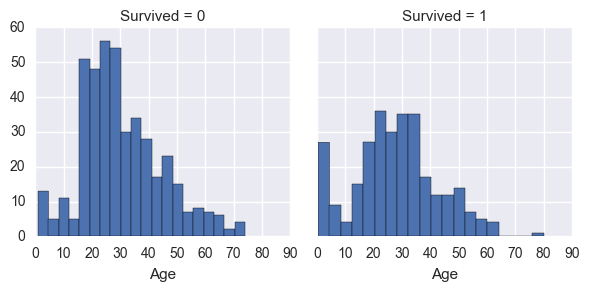

In [119]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

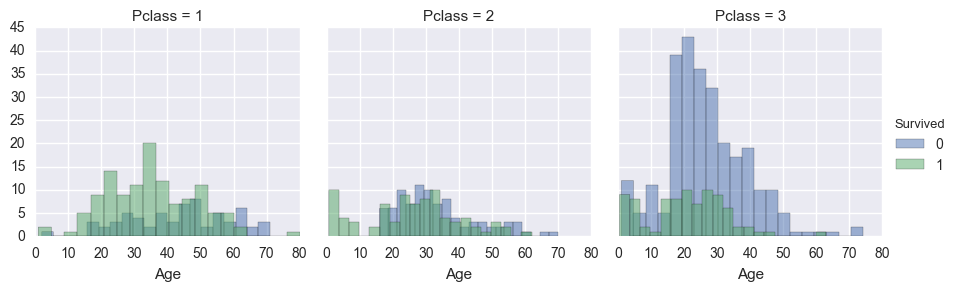

In [120]:
g = sns.FacetGrid(df, col='Pclass', hue='Survived')
g.map(plt.hist, 'Age', bins=20, alpha=0.5)
g.add_legend()

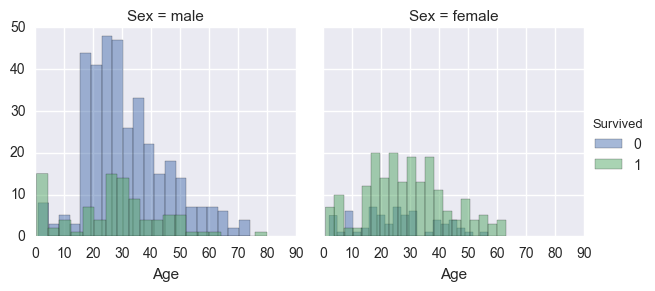

In [121]:
g = sns.FacetGrid(df, col='Sex', hue='Survived')
g.map(plt.hist, 'Age', bins=20, alpha=0.5)
g.add_legend()

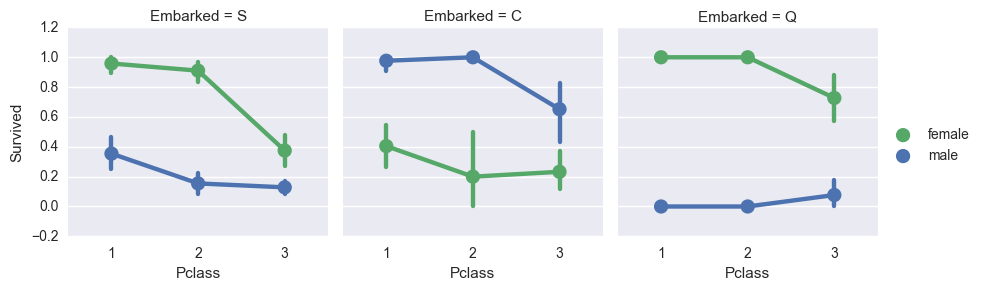

In [122]:
g = sns.FacetGrid(df, col='Embarked')
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
g.add_legend()

In [123]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)

test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)


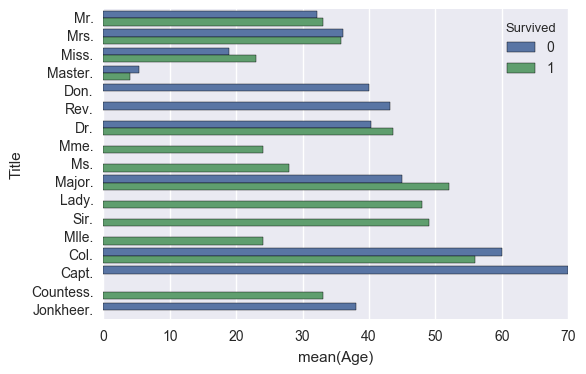

In [124]:
train_df['Title'] = train_df.Name.str.extract('(\w+\.)', expand=False)
test_df['Title'] = test_df.Name.str.extract('(\w+\.)', expand=False)

sns.barplot(hue='Survived', x='Age', y='Title', data=train_df, ci=False)

In [125]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [126]:
test_df.describe(include=['O'])

,Sex,Embarked,Title
count,418,418,418
unique,2,3,9
top,male,S,Mr.
freq,266,270,240


In [127]:
train_df['Gender'] = train_df['Sex'].map({'female': 1, 'male': 0}).astype(int)

In [128]:
train_df.loc[:, ['Gender', 'Sex']].head()

,Gender,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male


In [129]:
test_df['Gender'] = test_df['Sex'].map({'female': 1, 'male': 0}).astype(int)

train_df = train_df.drop(['Sex'], axis=1)

test_df = test_df.drop(['Sex'], axis=1)

In [130]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Gender
0,0,3,22.0,1,0,7.2500,S,Mr.,0
1,1,1,38.0,1,0,71.2833,C,Mrs.,1
2,1,3,26.0,0,0,7.9250,S,Miss.,1
3,1,1,35.0,1,0,53.1000,S,Mrs.,1
4,0,3,35.0,0,0,8.0500,S,Mr.,0


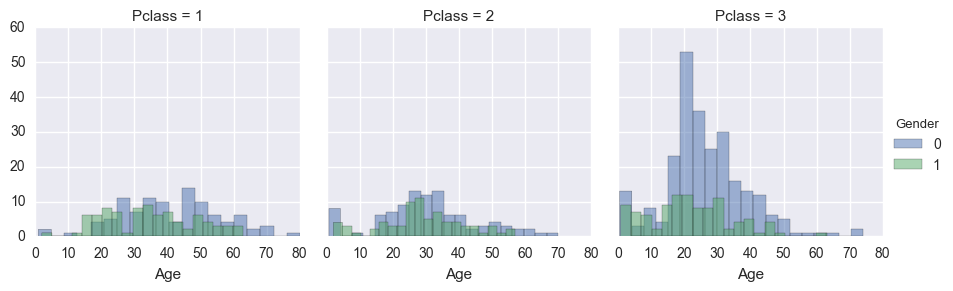

In [131]:
g = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
g.map(plt.hist, 'Age', alpha=0.5, bins=20)
g.add_legend()

In [132]:
guess_ages = np.zeros((2,3))

for i in range(2):
    for j in range(3):
        guess_df = train_df[((train_df['Gender'] == i) &
                             (train_df['Pclass'] == j+1))]['Age'].dropna()
        age_guess = guess_df.median()
        guess_ages[i, j] = int(age_guess/0.5 + 0.5) * 0.5
guess_ages

array([[ 40. ,  30. ,  25. ],
       [ 35. ,  28. ,  21.5]])

In [133]:
guess_ages_c = np.zeros((2,3))
concat_df = pd.concat([train_df, test_df])

for i in range(2):
    for j in range(3):
        guess_df = concat_df[((concat_df['Gender'] == i) &
                             (concat_df['Pclass'] == j+1))]['Age'].dropna()
        age_guess = guess_df.median()
        guess_ages_c[i, j] = int(age_guess/0.5 + 0.5) * 0.5
guess_ages_c

array([[ 42. ,  29.5,  25. ],
       [ 36. ,  28. ,  22. ]])

In [134]:
guess_ages - guess_ages_c

array([[-2. ,  0.5,  0. ],
       [-1. ,  0. , -0.5]])

In [135]:
train_df['AgeFill'] = train_df['Age']

for i in range(2):
    for j in range(3):
        train_df.loc[(train_df.Age.isnull()) & \
                     (train_df.Gender == i) & \
                     (train_df.Pclass == (j+1)), \
                    'AgeFill'] = guess_ages[i,j]

train_df[train_df.Age.isnull()][['Gender', 'Pclass', 'AgeFill']].head(10)

,Gender,Pclass,AgeFill
5,0,3,25.0
17,0,2,30.0
19,1,3,21.5
26,0,3,25.0
28,1,3,21.5
29,0,3,25.0
31,1,1,35.0
32,1,3,21.5
36,0,3,25.0
42,0,3,25.0


In [136]:
test_guess_ages = np.zeros((2,3))

for i in range(2):
    for j in range(3):
        guess_df = train_df[((train_df['Gender'] == i) &
                             (train_df['Pclass'] == j+1))]['Age'].dropna()
        age_guess = guess_df.median()
        test_guess_ages[i, j] = int(age_guess/0.5 + 0.5) * 0.5

test_df['AgeFill'] = test_df['Age']

for i in range(2):
    for j in range(3):
        test_df.loc[(test_df.Age.isnull()) & \
                     (test_df.Gender == i) & \
                     (test_df.Pclass == (j+1)), \
                    'AgeFill'] = test_guess_ages[i,j]

test_df[test_df.Age.isnull()][['Gender', 'Pclass', 'AgeFill']].head(10)

,Gender,Pclass,AgeFill
10,0,3,25.0
22,1,1,35.0
29,0,3,25.0
33,1,3,21.5
36,1,3,21.5
39,0,3,25.0
41,0,1,40.0
47,0,3,25.0
54,0,2,30.0
58,0,3,25.0


In [137]:
train_df = train_df.drop(['Age'], axis=1)
test_df = test_df.drop(['Age'], axis=1)
train_df.head()

,Survived,Pclass,SibSp,Parch,Fare,Embarked,Title,Gender,AgeFill
0,0,3,1,0,7.2500,S,Mr.,0,22.0
1,1,1,1,0,71.2833,C,Mrs.,1,38.0
2,1,3,0,0,7.9250,S,Miss.,1,26.0
3,1,1,1,0,53.1000,S,Mrs.,1,35.0
4,0,3,0,0,8.0500,S,Mr.,0,35.0


In [138]:
train_df['Age_m_Class'] = train_df.AgeFill * train_df.Pclass
test_df['Age_m_Class'] = test_df.AgeFill * test_df.Pclass
train_df[['AgeFill', 'Age_m_Class']].head()

,AgeFill,Age_m_Class
0,22.0,66.0
1,38.0,38.0
2,26.0,78.0
3,35.0,35.0
4,35.0,105.0


In [139]:
freq_port = train_df.Embarked.dropna().mode()[0]
train_df['EmbarkedFill'] = train_df['Embarked']
train_df.loc[train_df.Embarked.isnull(), 'EmbarkedFill'] = freq_port

In [140]:
test_df.head()

,PassengerId,Pclass,SibSp,Parch,Fare,Embarked,Title,Gender,AgeFill,Age_m_Class
0,892,3,0,0,7.8292,Q,Mr.,0,34.5,103.5
1,893,3,1,0,7.0000,S,Mrs.,1,47.0,141.0
2,894,2,0,0,9.6875,Q,Mr.,0,62.0,124.0
3,895,3,0,0,8.6625,S,Mr.,0,27.0,81.0
4,896,3,1,1,12.2875,S,Mrs.,1,22.0,66.0


In [141]:
test_df['EmbarkedFill'] = test_df['Embarked']
test_df.loc[test_df.Embarked.isnull(), 'EmbarkedFill'] = freq_port
train_df = train_df.drop(['Embarked'], axis=1)
test_df = test_df.drop(['Embarked'], axis=1)
train_df.head()

,Survived,Pclass,SibSp,Parch,Fare,Embarked,Title,Gender,AgeFill,Age_m_Class,EmbarkedFill
0,0,3,1,0,7.2500,S,Mr.,0,22.0,66.0,S
1,1,1,1,0,71.2833,C,Mrs.,1,38.0,38.0,C
2,1,3,0,0,7.9250,S,Miss.,1,26.0,78.0,S
3,1,1,1,0,53.1000,S,Mrs.,1,35.0,35.0,S
4,0,3,0,0,8.0500,S,Mr.,0,35.0,105.0,S


In [142]:
port_map = dict((v, k) for k,v in enumerate(np.unique(train_df['EmbarkedFill'])))
train_df['Port'] = train_df.EmbarkedFill.map(port_map)
test_df['Port'] = test_df.EmbarkedFill.map(port_map)
train_df[['EmbarkedFill', 'Port']].head()

,EmbarkedFill,Port
0,S,2
1,C,0
2,S,2
3,S,2
4,S,2


In [143]:
title_map = dict((v, k) for k,v in enumerate(np.unique(train_df['Title'])))
train_df['TitleBand'] = train_df.Title.map(title_map)
test_df['TitleBand'] = test_df.Title.map(title_map)
train_df[['Title', 'TitleBand']].head()

,Title,TitleBand
0,Mr.,12
1,Mrs.,13
2,Miss.,9
3,Mrs.,13
4,Mr.,12


In [144]:
train_df = train_df.drop(['EmbarkedFill', 'Title'], axis=1)
test_df = test_df.drop(['EmbarkedFill', 'Title'], axis=1)
train_df.head()

,Survived,Pclass,SibSp,Parch,Fare,Embarked,Gender,AgeFill,Age_m_Class,Port,TitleBand
0,0,3,1,0,7.2500,S,0,22.0,66.0,2,12
1,1,1,1,0,71.2833,C,1,38.0,38.0,0,13
2,1,3,0,0,7.9250,S,1,26.0,78.0,2,9
3,1,1,1,0,53.1000,S,1,35.0,35.0,2,13
4,0,3,0,0,8.0500,S,0,35.0,105.0,2,12


In [145]:
train_df['Fare'].fillna(train_df.Fare.median(), inplace=True)
test_df['Fare'].fillna(test_df.Fare.median(), inplace=True)

In [148]:
train_df.head()

,Survived,Pclass,SibSp,Parch,Fare,Gender,AgeFill,Age_m_Class,Port,TitleBand
0,0,3,1,0,7.2500,0,22.0,66.0,2,12
1,1,1,1,0,71.2833,1,38.0,38.0,0,13
2,1,3,0,0,7.9250,1,26.0,78.0,2,9
3,1,1,1,0,53.1000,1,35.0,35.0,2,13
4,0,3,0,0,8.0500,0,35.0,105.0,2,12


In [149]:
x_train = train_df.drop("Survived", axis=1)

y_train = train_df["Survived"]

In [150]:
logreg = LogisticRegression()

In [151]:
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [154]:
logreg.score(x_train, y_train)

0.81032547699214363

In [204]:
x_test = test_df.drop('PassengerId', axis=1)

In [206]:
y_pred = logreg.predict(x_test)

In [207]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,